In [1]:
# Importing the MNIST handwritten number set
from keras.datasets import mnist

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Ploting one sample to get some intuition
import matplotlib.pyplot as plt
plt.imshow(train_data[100], cmap='gray')
len(train_data)
len(test_data)

10000

In [13]:
# Set up the model
from keras import models
from keras import layers

epochs_num = 5

model = models.Sequential()
model.add(layers.Dense(512, activation='relu' , input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [5]:
# Vectorize the data
from keras.utils.np_utils import to_categorical

x_train = train_data.reshape((60000,28*28)).astype('float32')
y_train = to_categorical(train_labels)

x_test = test_data.reshape((10000,28*28)).astype('float32')
y_test = to_categorical(test_labels)

In [14]:
# Learn!
history = model.fit(x_train, y_train, epochs = epochs_num, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 8s 136us/step - loss: 12.5568 - acc: 0.2204
Epoch 2/5
60000/60000 [==============================] - 8s 130us/step - loss: 10.2879 - acc: 0.3610
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 10.1189 - acc: 0.3717
Epoch 4/5
60000/60000 [==============================] - 8s 138us/step - loss: 10.0575 - acc: 0.3755
Epoch 5/5
60000/60000 [==============================] - 9s 145us/step - loss: 10.0142 - acc: 0.3783


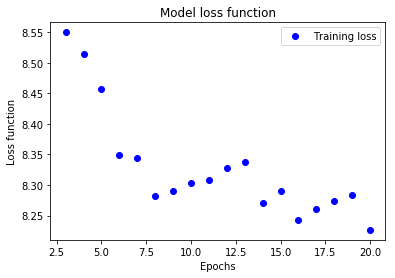

In [10]:
# Lets plot the loss plots - val set needs to be added
loss_train = history.history['loss']
loss_val  = history.history['val_loss']

epochs = range(1, epochs_num + 1)


import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs, loss_train, 'bo', label="Training loss")
plt.plot(epochs, loss_val, 'b', label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.title('Model loss function')
plt.legend()
plt.show()


In [ ]:
# Let's plot the accuracy - val set needs to be added
acc_train = history.history['acc']
acc_val  = history.history['val_acc']

epochs = range(1, epochs_num + 1)


import matplotlib.pyplot as plt
plt.clf()
plt.plot(epochs, acc_train, 'bo', label="Training acc")
plt.plot(epochs, acc_val, 'b', label="Validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model accuracy')
plt.legend()
plt.show()

In [15]:
# Testing
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

10000/10000 [==============================] - 1s 102us/step
9.906003900146484
0.3847


In [ ]:
# The conclusion is that the parameters given by the author are an easter egg as they give much worse result